In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# =========================================
# AI-Powered Sales Forecasting Dashboard
# Task 1 - Future Interns
# Dataset: sales_data.csv
# =========================================

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

In [5]:
# Load dataset
df = pd.read_csv("/content/drive/MyDrive/sales_data.csv")

After mounting, you can load your data by providing the correct path to your file. For example, if your file is named `my_data.csv` and is located in the root of your Google Drive, you would use:

```python
data_path = '/content/drive/MyDrive/my_data.csv'
df = pd.read_csv(data_path)
display(df.head())
```

Please replace `my_data.csv` with the actual path to your file.

In [6]:
# Convert Sale_Date to datetime
df['Sale_Date'] = pd.to_datetime(df['Sale_Date'])

In [7]:
# Aggregate sales by date (IMPORTANT STEP)
daily_sales = df.groupby('Sale_Date')['Sales_Amount'].sum().reset_index()

In [8]:
# Rename columns for Prophet
daily_sales = daily_sales.rename(columns={
    'Sale_Date': 'ds',
    'Sales_Amount': 'y'
})

print(daily_sales.head())

          ds         y
0 2023-01-01  14141.12
1 2023-01-02   6452.79
2 2023-01-03  21319.08
3 2023-01-04  30175.06
4 2023-01-05  16708.75


In [9]:
# Initialize Prophet model
model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False
)

In [10]:
# Fit model
model.fit(daily_sales)

In [11]:
# Create future dates (next 90 days)
future = model.make_future_dataframe(periods=90)

In [12]:
# Forecast
forecast = model.predict(future)

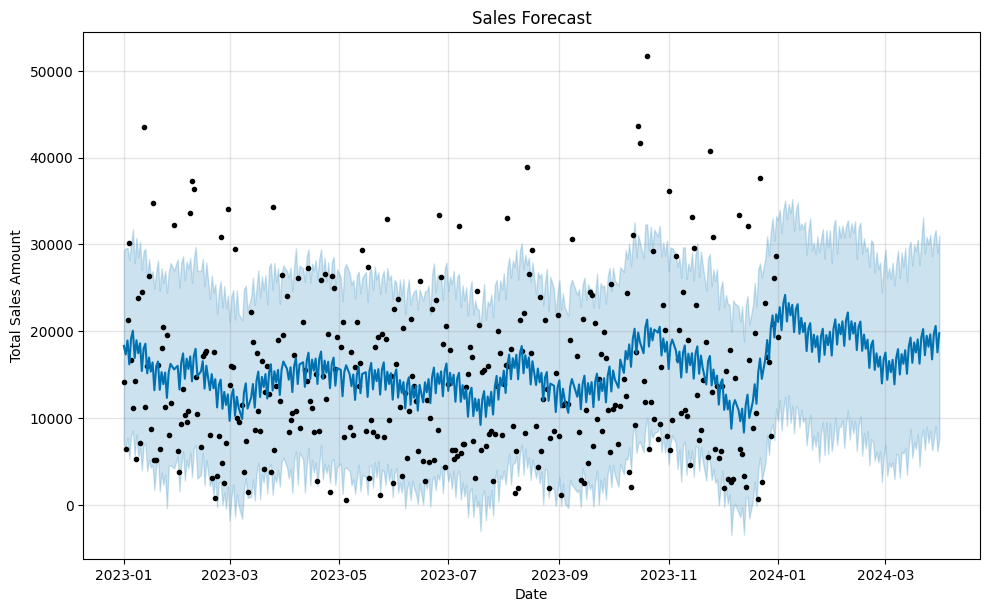

In [13]:
# Plot forecast
fig1 = model.plot(forecast)
plt.title("Sales Forecast")
plt.xlabel("Date")
plt.ylabel("Total Sales Amount")
plt.show()

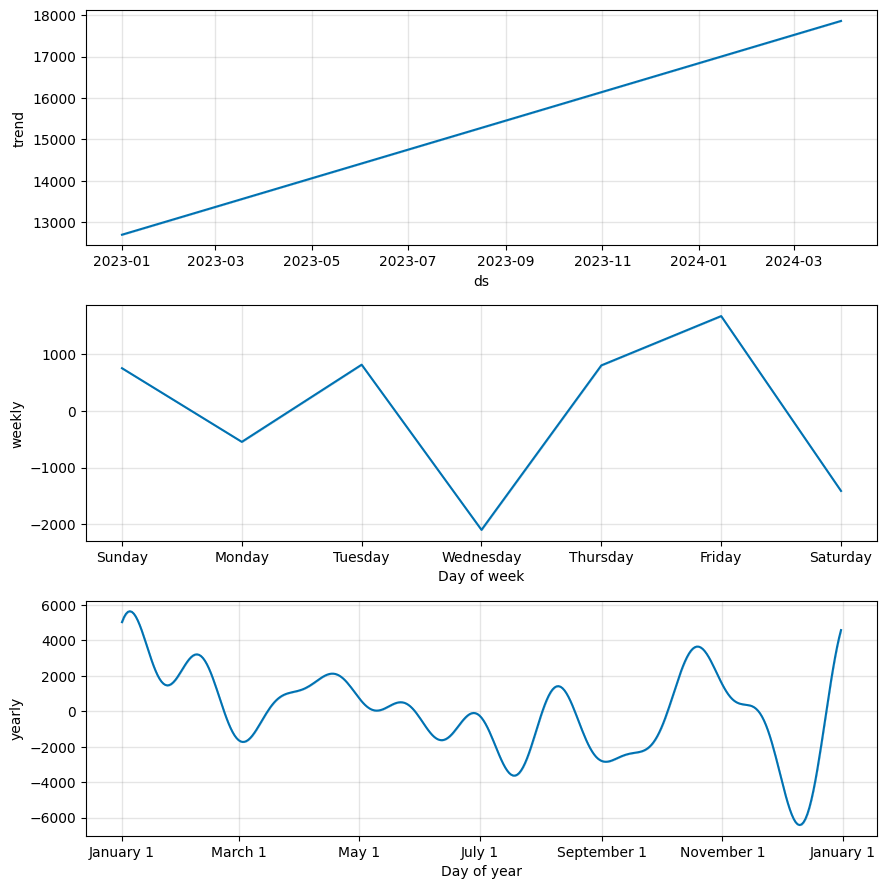

In [14]:

# Plot components
fig2 = model.plot_components(forecast)
plt.show()

In [16]:
import os

# Define the output directory path
output_dir = "../outputs"

# Create the output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Save output
fig1.savefig(os.path.join(output_dir, "sales_forecast.png"))